# Sprint 8. Prueba estadística t-test

Este proyecto tiene como finalidad analizar y explorar datos relacionados con el comportamiento de las empresas de taxis y los patrones de movilidad en la ciudad de Chicago. A través de técnicas de análisis de datos y pruebas estadísticas.

## Exploración de datos

In [8]:
# librerías
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [9]:
# carga de datasets
taxis = pd.read_csv(r"C:\Users\lgonzalezc\Downloads\moved_project_sql_result_01.csv")
barrios = pd.read_csv(r"C:\Users\lgonzalezc\Downloads\moved_project_sql_result_04.csv")

In [10]:
#función de exploración
def informacion(df):
    print('INFORMACIÓN GENERAL')
    print(df.info())
    print()
    print()
    print('SECCIÓN DE EJEMPLO')
    print(df.head(3))
    

In [11]:
informacion(taxis)

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


SECCIÓN DE EJEMPLO
                company_name  trips_amount
0                  Flash Cab         19558
1  Taxi Affiliation Services         11422
2           Medallion Leasin         10367


In [12]:
# exploración de DF
informacion(barrios)

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


SECCIÓN DE EJEMPLO
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667


## Análisis de datos

### Identificar los 10 principales barrios en términos de finalización del recorrido

In [13]:
# ordenar tabla
barrios_sorted = barrios.sort_values('average_trips', ascending = False)

In [14]:
# top 10 barrios con mas viahes 
top10_barrios = barrios_sorted.head(10)

**Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones**

In [15]:
# ordenamiento de DF taxis
taxis_sorted = taxis.sort_values('trips_amount', ascending = False)
# Limite de 5 primeras compañias con mas viajes
top_5_taxis = taxis_sorted.head()

In [16]:
top_5_taxis

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


### Top 5 compañias de Taxis con más viajes

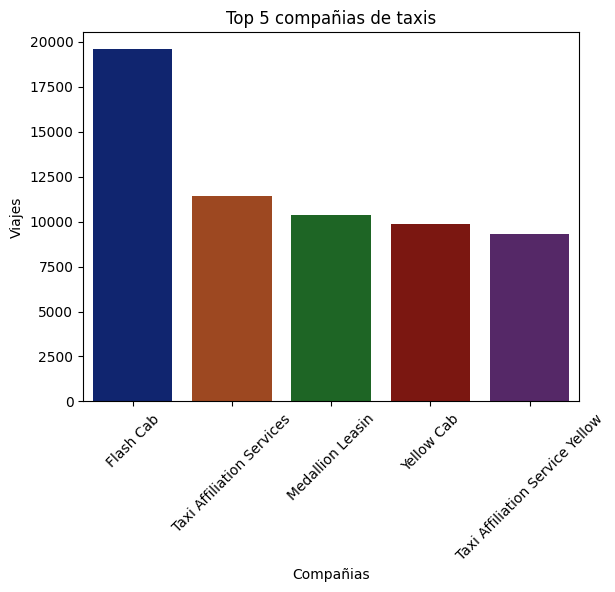

In [24]:
# graficación
sns.barplot(data = top_5_taxis, x = 'company_name', y='trips_amount', palette = 'dark', hue = 'company_name')
plt.xticks(rotation=45)
plt.title ('Top 5 compañias de taxis')
plt.xlabel ('Compañias')
plt.ylabel ('Viajes')
plt.show()

La empresa "Flash Cab" es la líder en cantidad de viajes, con una diferencia considerable sobre las demás compañías.

### Top 10 barrios con mas viajes

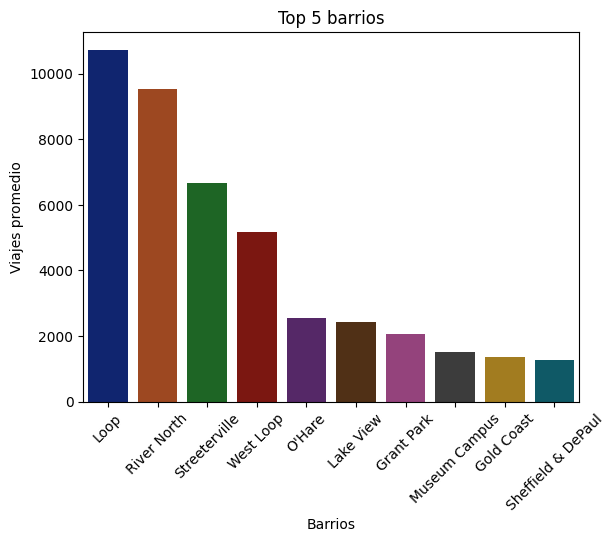

In [23]:
# graficación
sns.barplot(data = top10_barrios, x = 'dropoff_location_name', y='average_trips', palette = 'dark', hue = 'dropoff_location_name')
plt.xticks(rotation=45)
plt.title ('Top 5 barrios')
plt.xlabel ('Barrios')
plt.ylabel ('Viajes promedio')
plt.show()

"Loop" es el barrio con el mayor número de viajes promedio, lo que indica que es una zona con alta demanda de taxis.

## Prueba de hipótesis (Python)

Se carga un DF contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, estos son los valores de campo de la tabla:

**start_ts:** fecha y hora de la recogida

**weather_conditions:** condiciones climáticas en el momento en el que comenzó el viaje

**duration_seconds:** duración del viaje en segundos

**Prueba la hipótesis:**

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

**Explica:**

Cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

In [26]:
# carga de dataset
viajes = pd.read_csv(r'C:\Users\lgonzalezc\Downloads\moved_project_sql_result_07.csv')

In [27]:
# exploración DF
informacion(viajes)

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


SECCIÓN DE EJEMPLO
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0


**Planteamiento de hipótesis**

H0 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

H1 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Se utilizará la prueba t-test de Student para muestras independientes porque se busca comparar si existe una diferencia significativa entre las medias de la duración de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare en sábados lluviosos y sábados sin lluvia, los cuales representan dos grupos distintos. Además, no se asumió igualdad de varianzas entre los grupos (equal_var=False), dado que las condiciones climáticas podrían afectar la variabilidad de los tiempos de viaje. Este análisis es apropiado para datos numéricos y continuos, como la duración del viaje, y el nivel de significancia (α=0.05) permite evaluar con un 95% de confianza si las diferencias observadas son estadísticamente significativas.

In [32]:
# conversión de columna start_ts a datetime
viajes['start_ts'] = viajes['start_ts'].astype('datetime64[ns]')

In [35]:
# verificación de que todos los días en la tabla sean sábados
viajes['day'] = viajes['start_ts'].dt.day_name()
print(viajes['day'].unique())

['Saturday']


In [37]:
# verificación de valores únicos en el campo 'weather_conditions'
viajes['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

Una vez comprobadas los valores únicos en ambos campos, procederé a la prueba de hipótesis.

In [38]:
# varibales
sabado_lluvioso = viajes.query("weather_conditions == 'Bad'")['duration_seconds']
sabado_soleado = viajes.query("weather_conditions == 'Good'")['duration_seconds'] 

In [39]:
# t-test para muestras independientes con varianzas diferentes
resultados_prueba_sabados = st.ttest_ind(sabado_lluvioso,sabado_soleado, equal_var = False)
# valor alpha (sensibilidad)
alpha = 0.05

In [40]:
# impresión del valor p
resultados_prueba_sabados.pvalue

np.float64(6.738994326108734e-12)

In [41]:
# resultado
if resultados_prueba_sabados.pvalue < alpha:
    print('Se rechaza hipótesis nula')
else: 
    print('No podemos rechazar hipótesis nula')

Se rechaza hipótesis nula


**Conclusión: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.**

## Conclusión

Este proyecto ha permitido aplicar diversas técnicas de análisis de datos para abordar preguntas clave relacionadas con el comportamiento de las empresas de taxis y los patrones de movilidad en Chicago, así como para evaluar el impacto de las condiciones climáticas en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

En primer lugar, a través del análisis exploratorio de los datos proporcionados en los dos archivos CSV, se identificaron patrones significativos en la cantidad de viajes realizados por las diferentes empresas de taxis y la distribución de los viajes por barrios de la ciudad. Las visualizaciones generadas, como gráficos de barras, facilitaron la comprensión de estos patrones y ayudaron a identificar los principales actores en términos de actividad de viajes tanto a nivel de empresas como de barrios.

En segundo lugar, se llevó a cabo una prueba de hipótesis para analizar si las condiciones climáticas influían en la duración de los viajes. A través de una prueba estadística (prueba t de Student), se evaluó si los sábados lluviosos presentaban una duración promedio diferente a la de los sábados sin lluvia. Los resultados de esta prueba proporcionaron información útil sobre cómo el clima puede afectar la duración de los viajes en una ciudad con un alto volumen de tráfico.

En conjunto, el proyecto ha demostrado cómo la manipulación y análisis de datos pueden revelar patrones valiosos que permiten tomar decisiones informadas. Además, el uso de pruebas estadísticas permitió validar o refutar hipótesis sobre el comportamiento de los viajes bajo diferentes condiciones. Este análisis no solo mejora la comprensión de los datos, sino que también proporciona una base sólida para futuras investigaciones o aplicaciones en la optimización de las operaciones de las empresas de taxis y en la toma de decisiones logísticas en entornos urbanos dinámicos.